In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1：

### (a) Using trace files, i.e. files that contain addresses issued by some CPU to execute some application(s), draw the histogram of address distribution for each of them (2x20 points). On the Ox axis of the plot you will have the address number (don't start with zero, rather with the smallest address you find in the file and go up to the maximum address in the file). On the Oy axis you will have the number of occurrences for each particular address.

#### data preparation 

In [2]:
data_spice = pd.read_csv('../data/spice.din',sep=' ',names=['performs','address'])
data_tex = pd.read_csv('../data/tex.din',sep=' ',names=['performs','address'])

In [3]:
data_spice['address'] = data_spice['address'].apply(lambda x: int(x,16))
data_tex['address'] = data_tex['address'].apply(lambda x: int(x,16))

#### Data ready to complete, start drawing

In [4]:
draw_spice = data_spice['address'].to_list()
draw_tex = data_tex['address'].to_list()

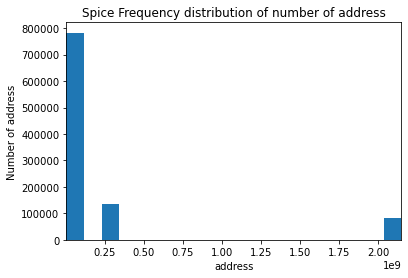

In [5]:
bins = np.linspace(min(draw_spice),max(draw_spice),20)

plt.xlim(min(draw_spice),max(draw_spice))
plt.hist(draw_spice,bins)

plt.xlabel('address')
plt.ylabel('Number of address')
plt.title('Spice Frequency distribution of number of address')

plt.savefig('./Spice_Frequency_address.jpg',bbox_inches='tight')

plt.show()

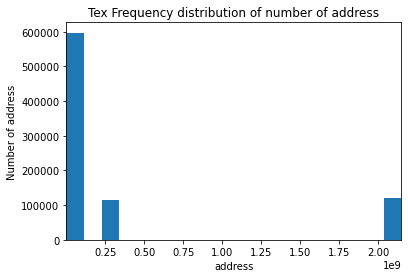

In [9]:
bins = np.linspace(min(draw_tex),max(draw_tex),20)

plt.xlim(min(draw_tex),max(draw_tex))
plt.hist(draw_tex,bins)

plt.xlabel('address')
plt.ylabel('Number of address')
plt.title('Tex Frequency distribution of number of address')

plt.savefig('./Tex_Frequency_address.jpg',bbox_inches='tight')

plt.show()

### What is the frequency of writes? What is the frequency of reads? Please comment on these results .

#### Spice :

In [7]:
fre_spice = data_spice.groupby('performs',as_index=False).count().rename(columns={"address":"frequency_num"})
fre_spice['frequency'] = fre_spice['frequency_num']/fre_spice['frequency_num'].sum()
fre_spice.head()

performs  frequency_num  frequency
0         0         150699   0.150699
1         1          66538   0.066538
2         2         782764   0.782763

#### Tex：

In [8]:
fre_tex = data_tex.groupby('performs',as_index=False).count().rename(columns={"address":"frequency_num"})
fre_tex['frequency'] = fre_tex['frequency_num']/fre_tex['frequency_num'].sum()
fre_tex.head()

performs  frequency_num  frequency
0         0         130655   0.156947
1         1         104513   0.125545
2         2         597309   0.717508